In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
from keras.models import Model
from keras.models import load_model
from keras import backend as K
import keras
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Activation, Input
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [4]:
(x_train, y_train), (x_test, y_test)= mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
print('x_train.shape =', x_train.shape)
print('y_train.shape =', y_train.shape)
print('x_test.shape =', x_test.shape)
print('y_test.shape =', y_test.shape)

x_train.shape = (60000, 28, 28)
y_train.shape = (60000,)
x_test.shape = (10000, 28, 28)
y_test.shape = (10000,)


In [6]:
np.random.seed(42)
x_shuffled=np.random.shuffle(x_train)
np.random.seed(42)
y_shuffled=np.random.shuffle(y_train)

In [7]:
print('x_train.shape =', x_train.shape)
print('y_train.shape =', y_train.shape)

x_train.shape = (60000, 28, 28)
y_train.shape = (60000,)


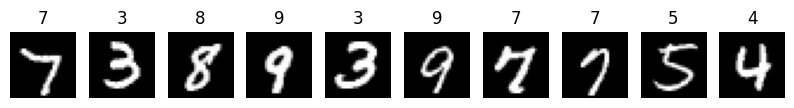

In [8]:
fig = plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(str(y_train[i]))
    plt.axis('off')
plt.show()

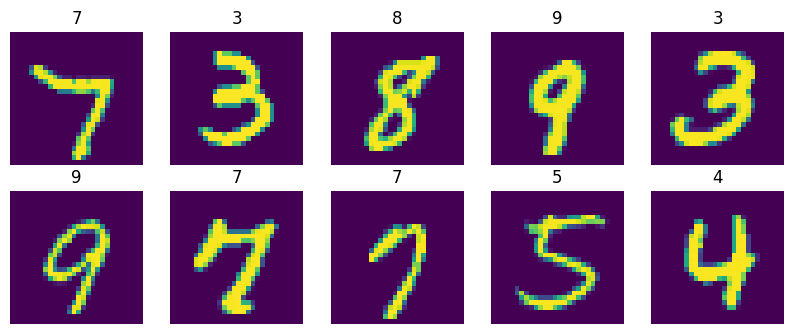

In [9]:
fig = plt.figure(figsize=(10, 10))
for i in range(10):
  img, lb= x_train[i], y_train[i]
  j=i+1
  fig.add_subplot(5, 5, j)
  plt.title(str(y_train[i]))
  plt.axis('off')
  plt.imshow(img)


In [10]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [11]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [12]:
print(y_train.shape)

(60000, 10)


In [13]:
model=Sequential()
model.add(Conv2D(32, 3, padding="same", activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, 3, padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, 3, padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

summary = model.summary()
print(summary)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 64)          0

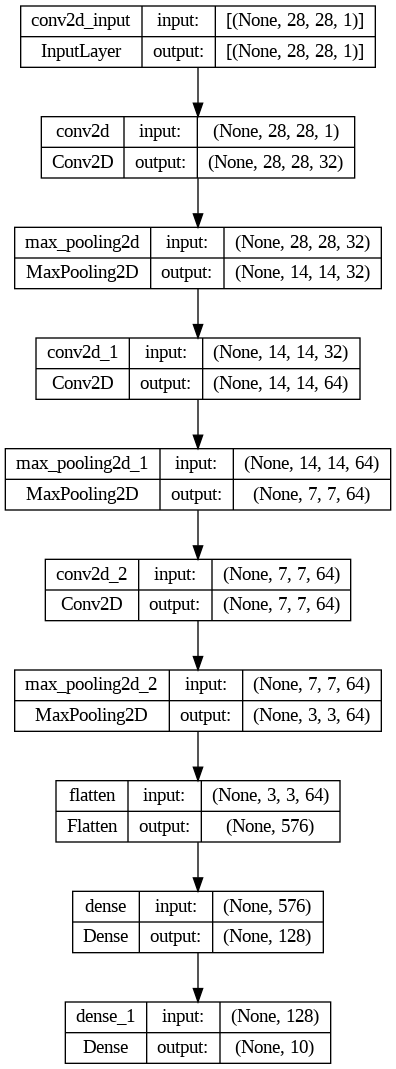

In [14]:
keras.utils.plot_model(model, to_file='model_summary.png', show_shapes=True, show_layer_names=True)

In [15]:
model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss=CategoricalCrossentropy(),
    metrics=['accuracy']
  )

In [16]:
num_classes = 10
E = 15
BATCH_SIZE = 64

In [17]:
history=model.fit(x_train.reshape(-1, 28, 28, 1), y_train, epochs=E, batch_size=BATCH_SIZE , validation_data=(x_test.reshape(-1, 28, 28, 1), y_test))

Epoch 1/15
938/938 [==============================] - 104s 109ms/step - loss: 0.1708 - accuracy: 0.9477 - val_loss: 0.0399 - val_accuracy: 0.9880
Epoch 2/15
938/938 [==============================] - 102s 109ms/step - loss: 0.0471 - accuracy: 0.9851 - val_loss: 0.0436 - val_accuracy: 0.9862
Epoch 3/15
938/938 [==============================] - 98s 104ms/step - loss: 0.0337 - accuracy: 0.9894 - val_loss: 0.0305 - val_accuracy: 0.9907
Epoch 4/15
938/938 [==============================] - 98s 104ms/step - loss: 0.0252 - accuracy: 0.9922 - val_loss: 0.0307 - val_accuracy: 0.9911
Epoch 5/15
938/938 [==============================] - 100s 107ms/step - loss: 0.0213 - accuracy: 0.9931 - val_loss: 0.0383 - val_accuracy: 0.9878
Epoch 6/15
938/938 [==============================] - 97s 104ms/step - loss: 0.0181 - accuracy: 0.9940 - val_loss: 0.0338 - val_accuracy: 0.9893
Epoch 7/15
938/938 [==============================] - 98s 104ms/step - loss: 0.0125 - accuracy: 0.9956 - val_loss: 0.0358 - val

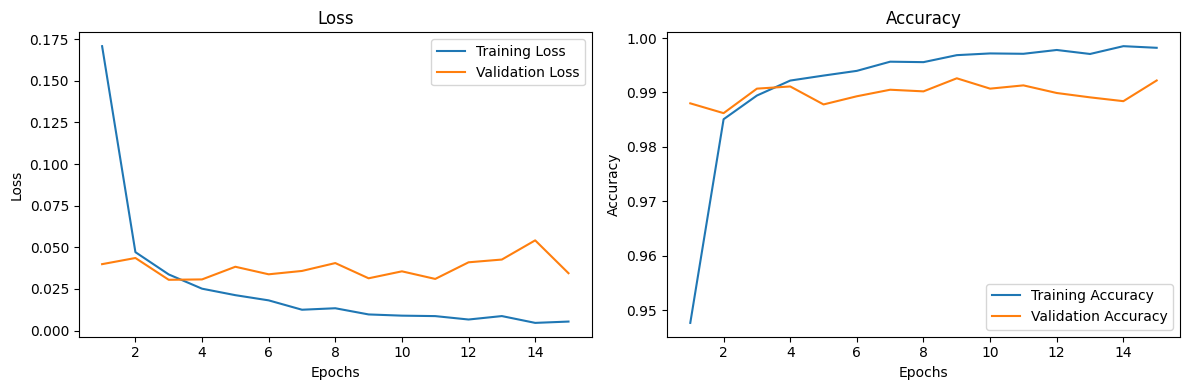

In [18]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the training and validation accuracy from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [65]:
last_conv_layer = model.layers[-5]

grad_model = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])

with tf.GradientTape() as tape:
    predictions, conv_outputs = grad_model(x_test[:10].reshape(-1, 28, 28, 1))
    sam =predictions[0]
    loss = predictions[:, np.argmax(sam)]
    grads = tape.gradient(loss, conv_outputs)
    temp = K.mean(grads, axis=(0, 1, 2))

heatmap = tf.reduce_mean(tf.multiply(temp, conv_outputs), axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

<Figure size 1000x1000 with 0 Axes>

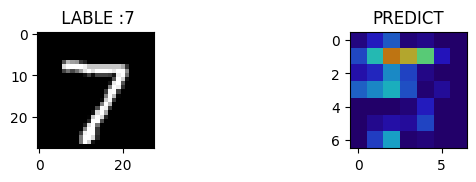

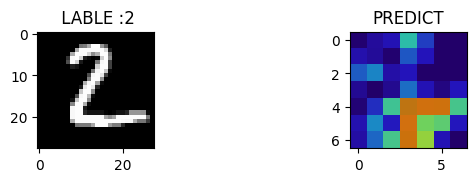

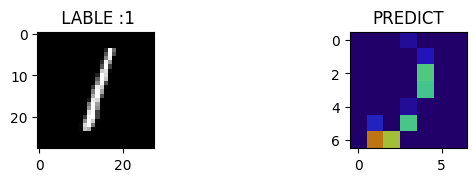

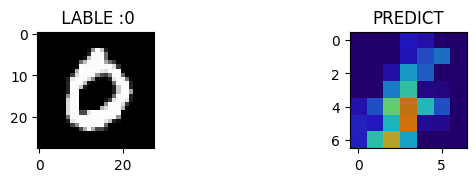

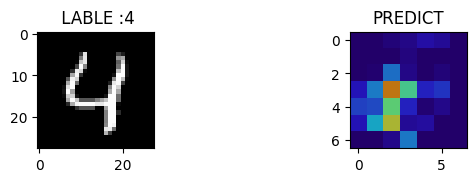

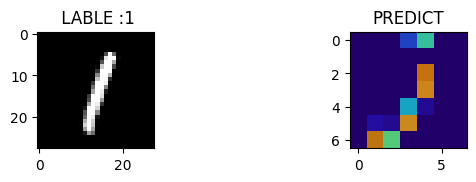

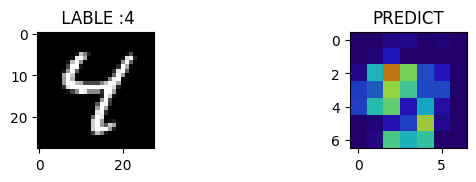

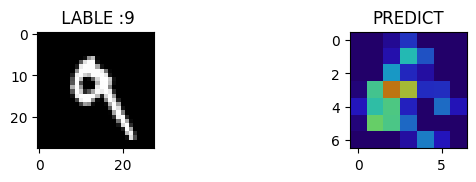

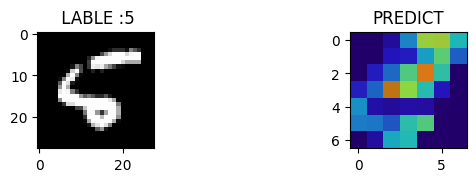

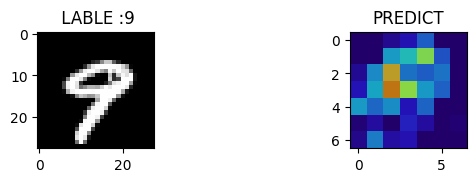

In [66]:
fig = plt.figure(figsize=(10, 10))
for img in range(10):

    plt.figure()
    plt.subplot(3, 2, 1)
    plt.imshow(x_test[img].squeeze(), cmap='gray')
    s=np.argmax(y_test[img])
    plt.title(f" LABLE :{s}")


    plt.subplot(3, 2, 2)
    plt.imshow(heatmap[img])
    plt.imshow(heatmap[img], cmap='jet', alpha=0.5)
    plt.title("PREDICT")

    plt.tight_layout()

plt.show()